## CNN(Baseline)

In [26]:
import numpy as np

# Load preprocessed features and labels
X_train = np.load('train_data_features.npy')
y_train = np.load('train_data_labels.npy')
X_test = np.load('test_data_features.npy')
y_test = np.load('test_data_labels.npy')

In [27]:
# Reshape the data: adding 1 channel for a grayscale-like image input (MFCC or other features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Input layer
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))

# Second convolutional layer
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))

# Flatten and add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

# Output layer for classification
# There are 6 emotion classes (SAD, HAP, ANGRY, etc.)
model.add(layers.Dense(6, activation='softmax'))  

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 30, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 15, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 13, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,390 (220.27 KB)

 Trainable params: 56,390 (220.27 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split= 0.2)

Epoch 1/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3142 - loss: 1.6339 - val_accuracy: 0.3955 - val_loss: 1.5062
Epoch 2/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4060 - loss: 1.4596 - val_accuracy: 0.4173 - val_loss: 1.4601
Epoch 3/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4221 - loss: 1.4114 - val_accuracy: 0.4223 - val_loss: 1.4385
Epoch 4/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4524 - loss: 1.3639 - val_accuracy: 0.4198 - val_loss: 1.4222
Epoch 5/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4684 - loss: 1.3297 - val_accuracy: 0.4484 - val_loss: 1.4008
Epoch 6/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4977 - loss: 1.2661 - val_accuracy: 0.4265 - val_loss: 1.4278
Epoch 7/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4972 - loss: 1.2400 - val_accuracy: 0.4425 - val_loss: 1.4014
Epoch 8/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5138 - loss: 1.2085 - val_accuracy: 0.

In [36]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4368 - loss: 1.5470
Test accuracy: 0.436534583568573


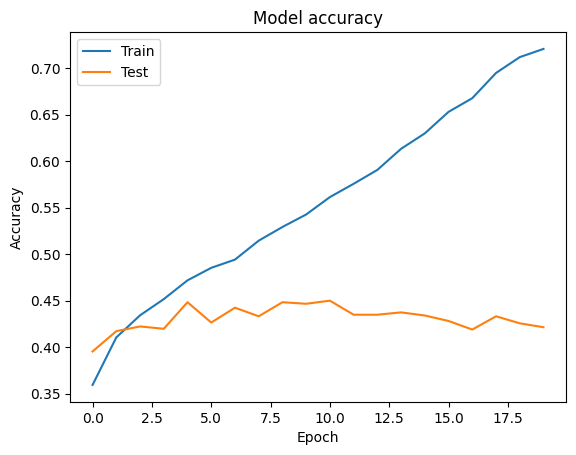

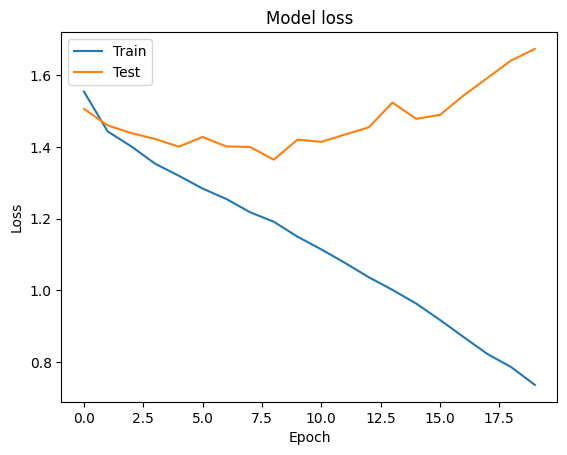

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Transformer Model

In [38]:
# Reshape the data for Transformer: (samples, sequence_length, feature_dim)
# Each feature vector is of shape (time_steps, n_features)
X_train = X_train.reshape((X_train.shape[0], -1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], -1, X_test.shape[1]))

In [41]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Transformer block with multi-head self-attention
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        # Apply self-attention
        attn_output = self.att(inputs, inputs)  
        attn_output = self.dropout1(attn_output, training=training)  # Pass 'training' here
        out1 = self.layernorm1(inputs + attn_output)  # Skip connection

        # Feed-forward network
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)  # Pass 'training' here
        return self.layernorm2(out1 + ffn_output)

class PositionalEmbedding(layers.Layer):
    def __init__(self, maxlen, embed_dim):
        super(PositionalEmbedding, self).__init__()
        self.token_emb = layers.Dense(embed_dim)  # Project input features to embed_dim
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-2]  # Length of the sequence (number of timesteps)
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)  # Map the input sequence to the embed_dim space
        return x + positions  # Add positional information to the input
    
# Define the model
def build_transformer_model(input_shape, embed_dim, num_heads, ff_dim, num_classes, maxlen):
    inputs = layers.Input(shape=input_shape)
    
    # Embedding input sequence
    x = PositionalEmbedding(maxlen, embed_dim)(inputs)
    
    # Transformer Block
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
    x = transformer_block(x, training = True)
    
    # Global average pooling layer
    x = layers.GlobalAveragePooling1D()(x)
    
    # Fully connected layer
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    
    # Output layer (for classification, use softmax activation)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    
    return model

# Define parameters
embed_dim = 64  # Embedding size for each token
num_heads = 4   # Number of attention heads
ff_dim = 128    # Hidden layer size in feed-forward network inside transformer
maxlen = X_train.shape[1]  # Maximum sequence length
num_classes = 6  # Number of emotion classes

# Build the transformer model
input_shape = (maxlen, X_train.shape[2])  # (sequence_length, feature_dimension)
model_2 = build_transformer_model(input_shape, embed_dim, num_heads, ff_dim, num_classes, maxlen)

# Compile the model
model_2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model summary
model_2.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_embedding_5          │ (None, 1, 64)          │         2,176 │
│ (PositionalEmbedding)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_4             │ (None, 1, 64)          │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,470 (369.02 KB)

 Trainable params: 94,470 (369.02 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Train the model
history = model_2.fit(X_train, y_train, epochs=30, batch_size=32, validation_split= 0.2)

Epoch 1/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3419 - loss: 1.6567 - val_accuracy: 0.4282 - val_loss: 1.4016
Epoch 2/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4369 - loss: 1.4115 - val_accuracy: 0.4484 - val_loss: 1.3727
Epoch 3/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4511 - loss: 1.3744 - val_accuracy: 0.4425 - val_loss: 1.3559
Epoch 4/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4852 - loss: 1.3077 - val_accuracy: 0.4542 - val_loss: 1.3227
Epoch 5/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4965 - loss: 1.2685 - val_accuracy: 0.4887 - val_loss: 1.3154
Epoch 6/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5029 - loss: 1.2425 - val_accuracy: 0.4635 - val_loss: 1.3361
Epoch 7/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5008 - loss: 1.2376 - val_accuracy: 0.4509 - val_loss: 1.3254
Epoch 8/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5077 - loss: 1.2150 - val_accuracy: 0.

In [43]:
# Evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5140 - loss: 1.3658
Test accuracy: 0.5070517063140869


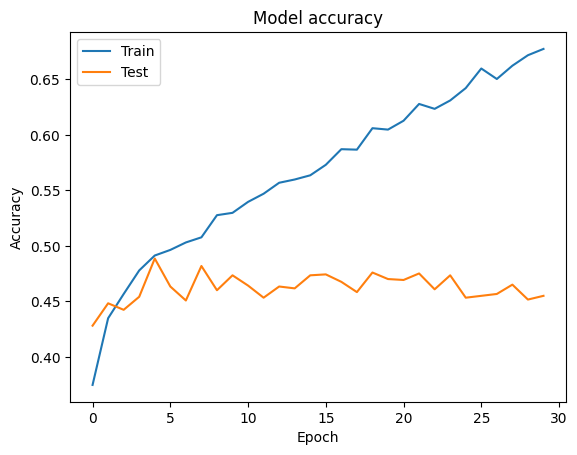

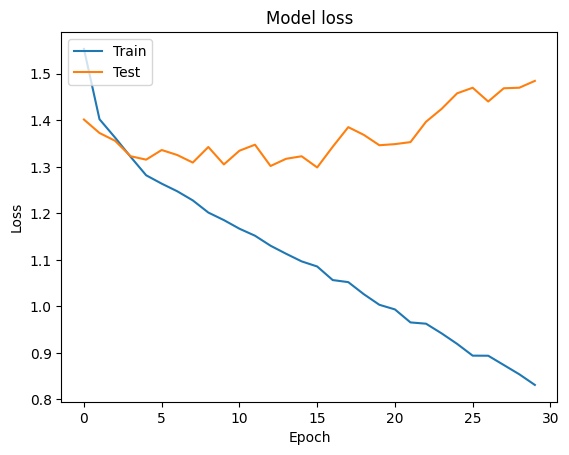

In [45]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## CNN+LSTM

In [46]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], 1)

In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN + LSTM model
def build_cnn_lstm_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    
    # CNN Block
    x = layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu")(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu")(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu")(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    
    # LSTM Block
    x = layers.LSTM(128, return_sequences=True)(x)  # Using return_sequences=True to pass sequences to the next LSTM layer
    x = layers.LSTM(64)(x)  # Second LSTM layer
    
    # Fully connected layers
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    
    # Output layer (for classification)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    # Create the model
    model = models.Model(inputs=inputs, outputs=outputs)
    
    return model

# Define parameters
num_classes = 6  # Number of emotion classes
input_shape = (X_train.shape[1], X_train.shape[2])  # (sequence_length, feature_dimension)

# Build the CNN + LSTM model
model_3 = build_cnn_lstm_model(input_shape, num_classes)

# Compile the model
model_3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model summary
model_3.summary()

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 32, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 32, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 16, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 8, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 4, 128)         │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 379,142 (1.45 MB)

 Trainable params: 379,142 (1.45 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Train the model
history = model_3.fit(X_train, y_train, validation_split= 0.2, epochs=30, batch_size=32)


Epoch 1/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4155 - loss: 1.4332 - val_accuracy: 0.4249 - val_loss: 1.4329
Epoch 2/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4385 - loss: 1.4018 - val_accuracy: 0.4223 - val_loss: 1.4236
Epoch 3/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4416 - loss: 1.3679 - val_accuracy: 0.4299 - val_loss: 1.4069
Epoch 4/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4706 - loss: 1.3334 - val_accuracy: 0.4165 - val_loss: 1.4488
Epoch 5/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4760 - loss: 1.3145 - val_accuracy: 0.4123 - val_loss: 1.4213
Epoch 6/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4960 - loss: 1.2733 - val_accuracy: 0.4291 - val_loss: 1.4095
Epoch 7/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5123 - loss: 1.2244 - val_accuracy: 0.4400 - val_loss: 1.3953
Epoch 8/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5295 - loss: 1.1935 - val_accuracy: 

In [52]:
# Evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4307 - loss: 3.3769
Test accuracy: 0.4103425145149231


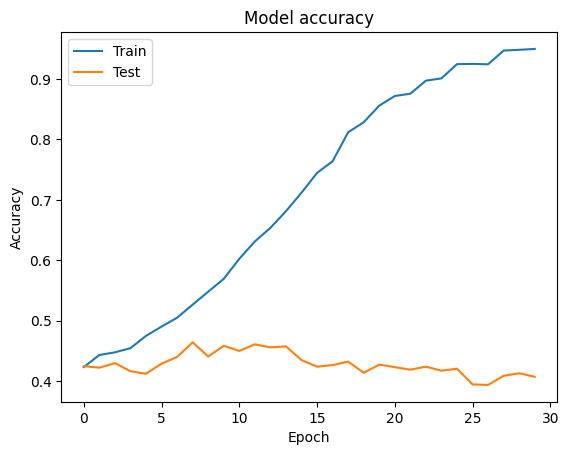

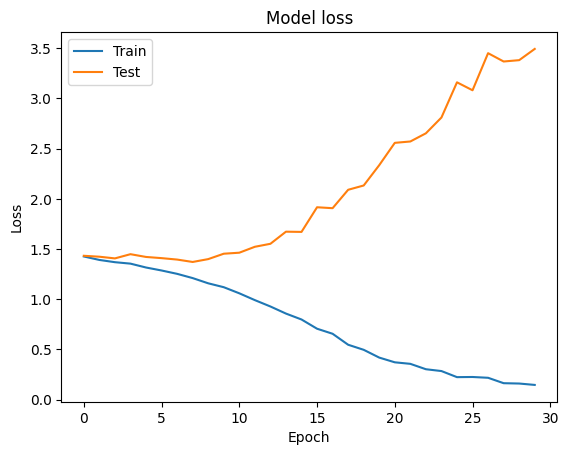

In [53]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()